In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [14]:
df = pd.read_csv('Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Cleaning

In [15]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df.shape

(7043, 21)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

There aren't any null values in the dataset, but as we can see below there is a little cleaning of the values to be done

We saw earlier that the 'TotalCharges' columns is an object. Since the values are numbers, let's convert it to float and use the errors='coerce' argument to replace empty values to null values


In [18]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Now let's remove the null values

In [19]:
df = df.dropna()
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Visualizing the data

In [20]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

Text(0.5,1,'Churned customers')

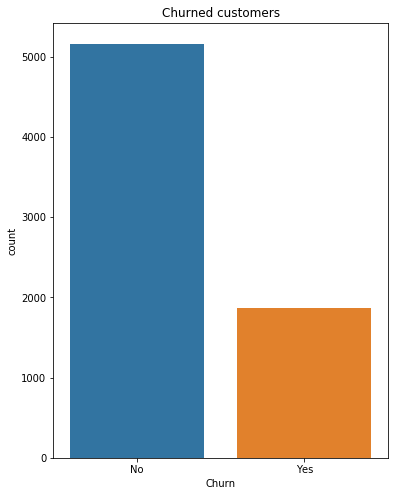

In [21]:
plt.figure(figsize=(6, 8))
sns.countplot(df['Churn'])
plt.title('Churned customers')

Let's look at some columns where we can intuitively guess that it will have a impact on Churn

In [22]:
contract_churn = df['Churn'].groupby(df['Contract']).value_counts().reset_index(name='Churn Count')
contract_churn

,Contract,Churn,Churn Count
0,Month-to-month,No,2220
1,Month-to-month,Yes,1655
2,One year,No,1306
3,One year,Yes,166
4,Two year,No,1637
5,Two year,Yes,48


Text(0.5,1,'Churned customers based on contract type')

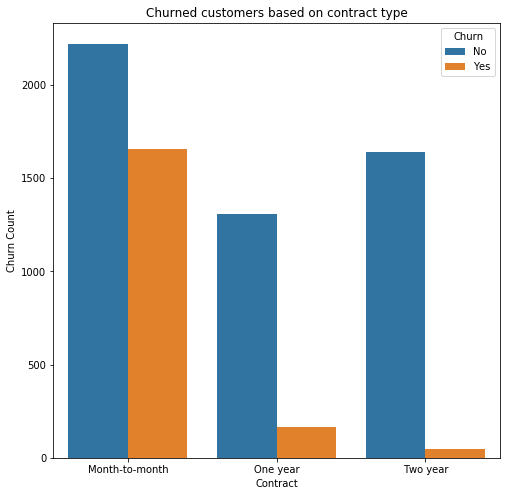

In [23]:
plt.figure(figsize=(8, 8))
sns.barplot(x=contract_churn['Contract'], y = contract_churn['Churn Count'], hue=contract_churn['Churn'], data=contract_churn)
plt.title('Churned customers based on contract type')

In [24]:
monthlyCharges_churn = df['MonthlyCharges'].groupby(df['Churn']).sum().reset_index()
monthlyCharges_churn

,Churn,MonthlyCharges
0,No,316530.15
1,Yes,139130.85


Text(0.5,1,'Churned customers based on monthly charges')

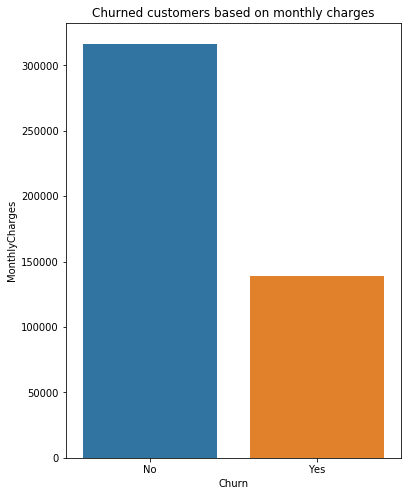

In [25]:
plt.figure(figsize=(6, 8))
sns.barplot(x = monthlyCharges_churn['Churn'], y=monthlyCharges_churn['MonthlyCharges'], data=monthlyCharges_churn)
plt.title('Churned customers based on monthly charges')

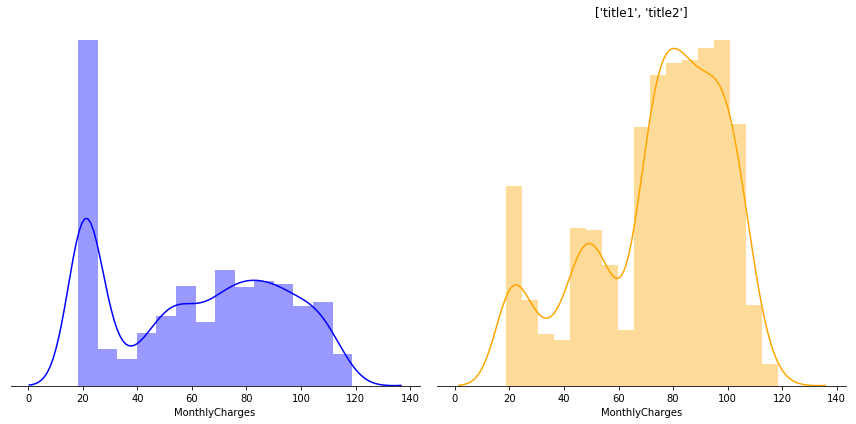

In [27]:
titles = ['title1', 'title2']

f, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

[ax.get_xaxis().get_major_formatter().set_scientific(False) for ax in axes.ravel()]

#How do I add a title to each subplot
for ax in titles:
    plt.title(titles)

sns.despine(left=True)

sns.distplot(df[(df.Churn == 'No')]['MonthlyCharges'], kde=True, color="b", ax=axes[0])
sns.distplot(df[(df.Churn == 'Yes')]['MonthlyCharges'], kde=True,  color="orange", ax=axes[1])


plt.setp(axes, yticks=[])

plt.tight_layout()

In [29]:
lab = df["Churn"].value_counts().keys().tolist()
lab

['No', 'Yes']

In [53]:
churn     = df[df["Churn"] == "Yes"]
not_churn = df[df["Churn"] == "No"]

In [117]:
ChurnedSeniorValues = churn['SeniorCitizen'].value_counts().values.tolist() / churn['SeniorCitizen'].count()
ChurnedSeniorLabels = ['Other', 'Senior Citizens']
ChurnedSeniorValues

array([0.74531835, 0.25468165])

In [118]:
NotChurnedSeniorValues = not_churn['SeniorCitizen'].value_counts().values.tolist() / not_churn['SeniorCitizen'].count()
NotChurnedSeniorValues

array([0.87100523, 0.12899477])

Text(0.5,1,'Percentage of Senior Citizens')

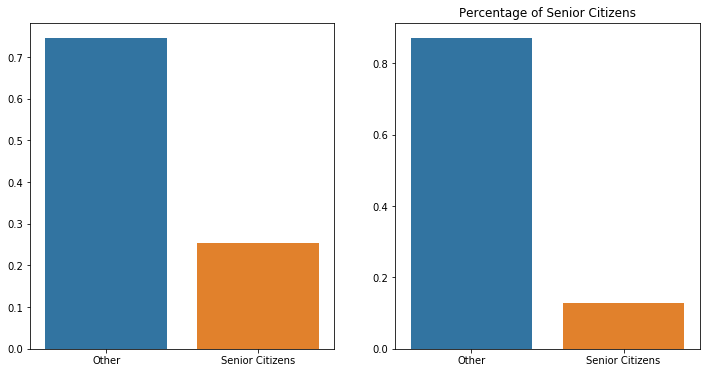

In [123]:
#How to a a title on both plots

f, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)
sns.barplot(x=ChurnedSeniorLabels, y = ChurnedSeniorValues, data=df, ax=axes[0])
sns.barplot(x=ChurnedSeniorLabels, y = NotChurnedSeniorValues, data=df, ax=axes[1])
plt.title('Percentage of Senior Citizens')

## Preprocessing

In [ ]:
df['MultipleLines'].unique()

In [ ]:
#Replace 'No phone service' values to 'No' in the MultipleLines Column

df['MultipleLines'].replace('No phone service', 'No', inplace=True)
df['MultipleLines'].unique()

#Replace 'No internet service' values to 'No' for serveral columns

replace_cols = ['MultipleLines', 'TechSupport', 'DeviceProtection', 'StreamingTV', 'StreamingMovies' ]
for i in replace_cols:
    df[i].replace('No internet service', 'No', inplace=True)


In [ ]:
df['Churn'].replace({'Yes': 1, 'No': 0}, inplace=True)
df["Churn"] = df.Churn.astype(int)
df["Churn"].dtype

In [ ]:
df.head(5)

In [ ]:
df2 = df.drop(['customerID'], axis=1)
df2.head(5)

In [ ]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include= [np.object]).columns
categorical_features

In [ ]:
df_dummies = pd.get_dummies(df2)
df_dummies.head(5)

In [ ]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include= [np.object]).columns

In [ ]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [ ]:
features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

In [ ]:
k_values = np.arange(1, 50)
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

In [ ]:
results = pd.DataFrame({
    'K': k_values,
    'Scores': scores
})
results.max()

In [ ]:
import matplotlib.ticker as plticker
ax = results.plot(x='K', y='Scores', figsize=(16, 7), x_compat=True)
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))

In [ ]:
#SVM

from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

In [ ]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds)) 